In [2]:
# Import all necessary libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Set up matplotlib for better plots
plt.style.use('default')
sns.set_palette("husl")

print("✓ All required packages imported successfully")
print("✓ Environment setup complete")

✓ All required packages imported successfully
✓ Environment setup complete


In [10]:
import pandas as pd
import numpy as np

# Part 1: Robust Data Loading and Basic Exploration
def load_cord19_data(filepath='metadata.csv'):
    """
    Robustly load CORD-19 metadata CSV file with error handling for parsing issues
    """
    print("Attempting to load CORD-19 metadata...")
    
    # Method 1: Try standard loading first
    try:
        print("Method 1: Standard CSV loading...")
        df = pd.read_csv(filepath)
        print("✓ Successfully loaded with standard method")
        return df
    except pd.errors.ParserError as e:
        print(f"✗ Standard method failed: {e}")
        print("Trying alternative methods...")
    
    # Method 2: Try with different quoting options
    try:
        print("Method 2: Loading with quote handling...")
        df = pd.read_csv(filepath, quoting=1, error_bad_lines=False, warn_bad_lines=True)
        print("✓ Successfully loaded with quote handling")
        return df
    except:
        print("✗ Quote handling method failed")
    
    # Method 3: Try with Python engine (slower but more robust)
    try:
        print("Method 3: Using Python parser engine...")
        df = pd.read_csv(filepath, engine='python', error_bad_lines=False, warn_bad_lines=True)
        print("✓ Successfully loaded with Python engine")
        return df
    except:
        print("✗ Python engine method failed")
    
    # Method 4: Try with modern error handling (pandas >= 1.3.0)
    try:
        print("Method 4: Using modern error handling...")
        df = pd.read_csv(filepath, on_bad_lines='skip')
        print("✓ Successfully loaded with modern error handling")
        return df
    except:
        print("✗ Modern error handling method failed")
    
    # Method 5: Load in chunks and concatenate
    try:
        print("Method 5: Loading in chunks...")
        chunk_list = []
        chunk_size = 10000
        
        for chunk in pd.read_csv(filepath, chunksize=chunk_size, on_bad_lines='skip'):
            chunk_list.append(chunk)
            if len(chunk_list) % 10 == 0:  # Progress indicator
                print(f"  Loaded {len(chunk_list) * chunk_size:,} rows...")
        
        df = pd.concat(chunk_list, ignore_index=True)
        print("✓ Successfully loaded in chunks")
        return df
    except Exception as e:
        print(f"✗ Chunk loading method failed: {e}")
    
    # Method 6: Last resort - skip problematic rows around the error location
    try:
        print("Method 6: Skip problematic rows...")
        # Skip rows around the problematic area (row 123547 mentioned in error)
        skiprows = list(range(123545, 123550))  # Skip a few rows around the problem
        df = pd.read_csv(filepath, skiprows=skiprows, on_bad_lines='skip')
        print("✓ Successfully loaded by skipping problematic rows")
        print(f"Note: Skipped rows {skiprows[0]}-{skiprows[-1]} due to parsing issues")
        return df
    except Exception as e:
        print(f"✗ All methods failed: {e}")
        return None

In [11]:
# Load the data
df = load_cord19_data('metadata.csv')

if df is not None:
    print("\n=== CORD-19 Dataset Basic Information ===")
    print(f"Dataset shape: {df.shape}")
    print(f"Total rows: {df.shape[0]:,}")
    print(f"Total columns: {df.shape[1]}")
    
    print("\n=== Column Names ===")
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col}")
    
    print("\n=== Data Types ===")
    print(df.dtypes)
    
    print("\n=== First 5 rows ===")
    print(df.head())
    
    print("\n=== Basic Statistics ===")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    
    # Check for missing values
    print("\n=== Missing Values Summary ===")
    missing_summary = df.isnull().sum()
    missing_pct = (missing_summary / len(df)) * 100
    
    for col in df.columns:
        if missing_summary[col] > 0:
            print(f"{col}: {missing_summary[col]:,} missing ({missing_pct[col]:.1f}%)")
    
    print("\n=== Sample of Key Columns ===")
    key_columns = ['title', 'authors', 'journal', 'publish_time', 'abstract']
    available_key_cols = [col for col in key_columns if col in df.columns]
    
    if available_key_cols:
        print(df[available_key_cols].head(3).to_string())
    
else:
    print("\n❌ Failed to load the dataset with all attempted methods.")
    print("\nTroubleshooting suggestions:")
    print("1. Check if 'metadata.csv' exists in the current directory")
    print("2. Verify the file is not corrupted (try opening in a text editor)")
    print("3. Check file permissions")
    print("4. Try downloading a fresh copy of the CORD-19 dataset")
    print("5. Consider using a different CSV file or subset of the data")

Attempting to load CORD-19 metadata...
Method 1: Standard CSV loading...
✗ Standard method failed: Error tokenizing data. C error: EOF inside string starting at row 123547
Trying alternative methods...
Method 2: Loading with quote handling...
✗ Quote handling method failed
Method 3: Using Python parser engine...
✗ Python engine method failed
Method 4: Using modern error handling...
✗ Modern error handling method failed
Method 5: Loading in chunks...
  Loaded 100,000 rows...
✗ Chunk loading method failed: Error tokenizing data. C error: EOF inside string starting at row 123547
Method 6: Skip problematic rows...


/tmp/ipykernel_710/445431040.py:70: DtypeWarning: Columns (1,5,6,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, skiprows=skiprows, on_bad_lines='skip')


✓ Successfully loaded by skipping problematic rows
Note: Skipped rows 123545-123549 due to parsing issues

=== CORD-19 Dataset Basic Information ===
Dataset shape: (123544, 19)
Total rows: 123,544
Total columns: 19

=== Column Names ===
 1. cord_uid
 2. sha
 3. source_x
 4. title
 5. doi
 6. pmcid
 7. pubmed_id
 8. license
 9. abstract
10. publish_time
11. authors
12. journal
13. mag_id
14. who_covidence_id
15. arxiv_id
16. pdf_json_files
17. pmc_json_files
18. url
19. s2_id

=== Data Types ===
cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id    float64
arxiv_id            float64
pdf_json_files       object
pmc_json_files       object
url                  obj

=== CORD-19 Dataset Comprehensive Analysis ===
Dataset successfully loaded: 123,544 papers, 19 columns

1. DATA QUALITY ASSESSMENT
Missing Values Summary:
          Column  Missing_Count  Missing_Percentage
        arxiv_id         123544          100.000000
          mag_id         123544          100.000000
who_covidence_id         123544          100.000000
           s2_id          79535           64.377873
  pmc_json_files          68123           55.140679
  pdf_json_files          65211           52.783624
             sha          65211           52.783624
       pubmed_id          46411           37.566373
           pmcid          44009           35.622127
        abstract          34701           28.087969
         authors          10382            8.403484
         journal           4214            3.410931
           title            172            0.139222


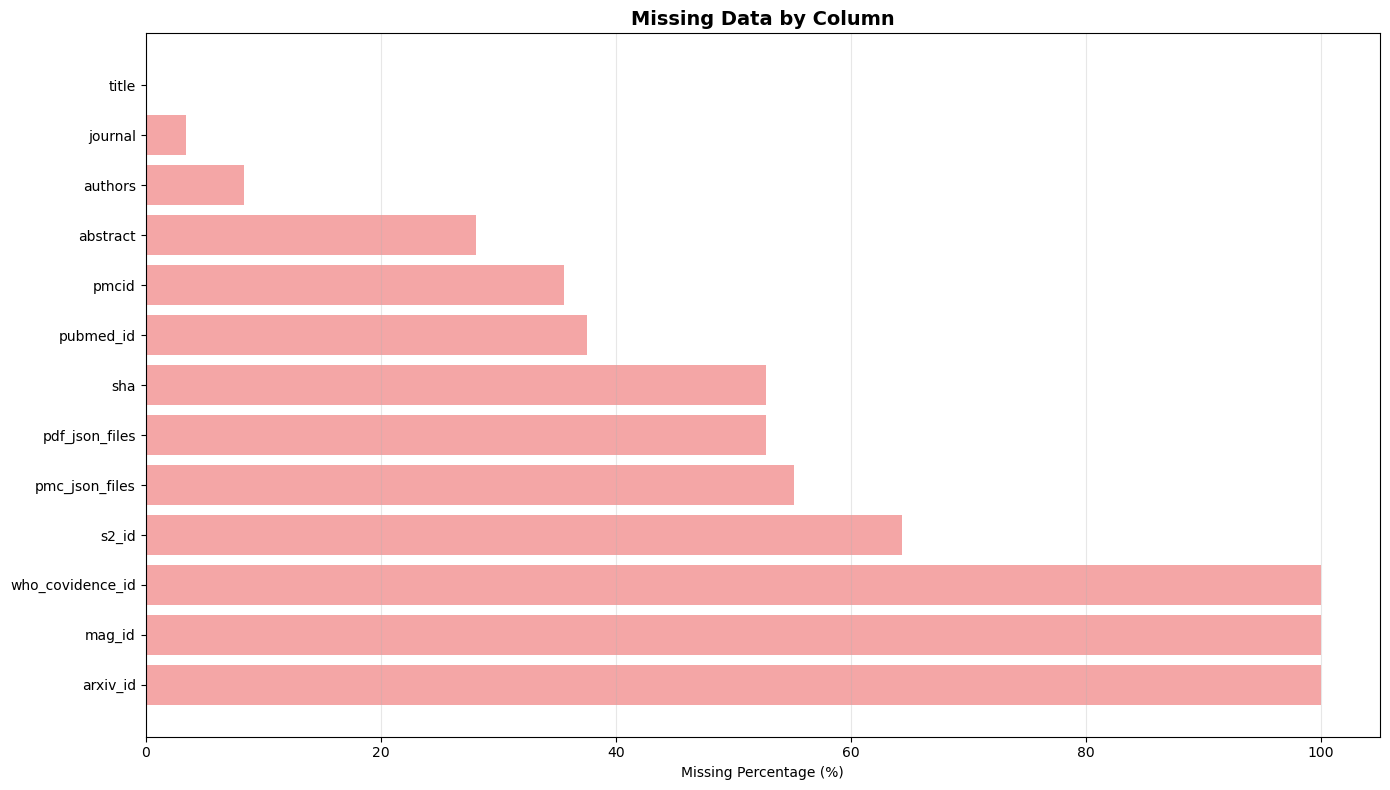


2. PUBLICATION TIMELINE ANALYSIS
Papers with extractable publication years: 123,014 (99.6%)
Publication year range: 1990 - 2024
Peak publication year: 2021 (39,679 papers)


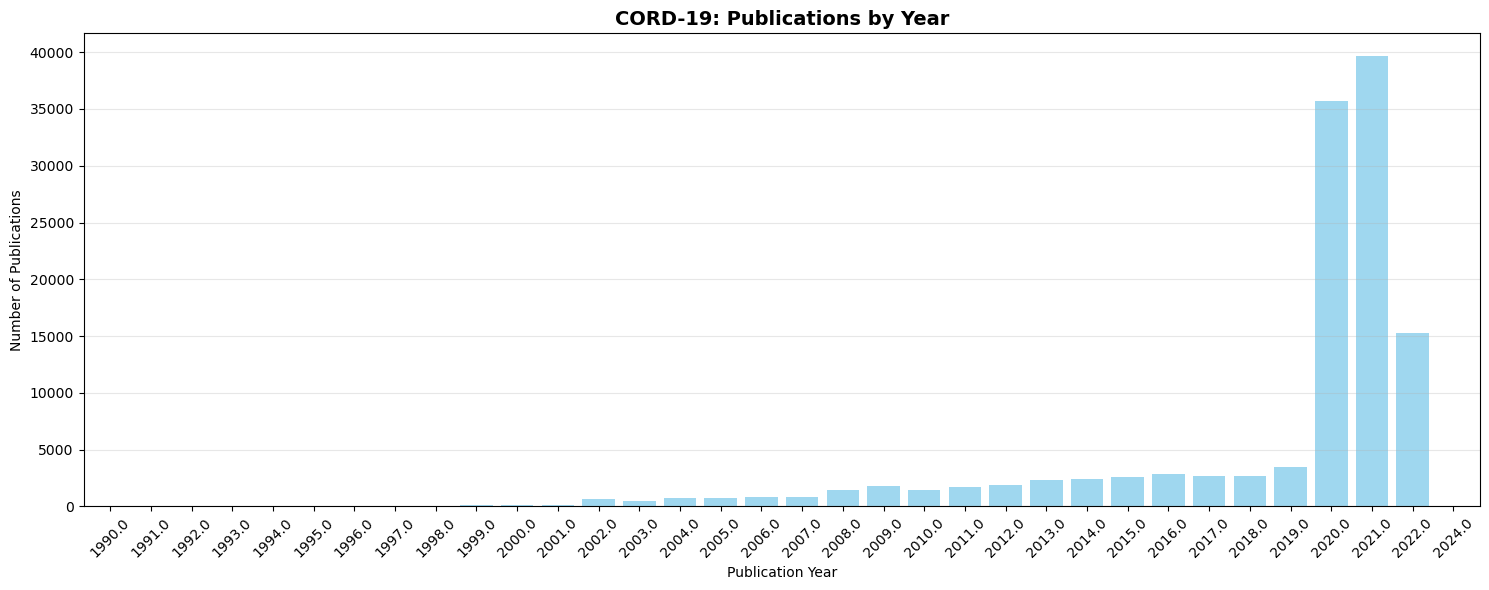

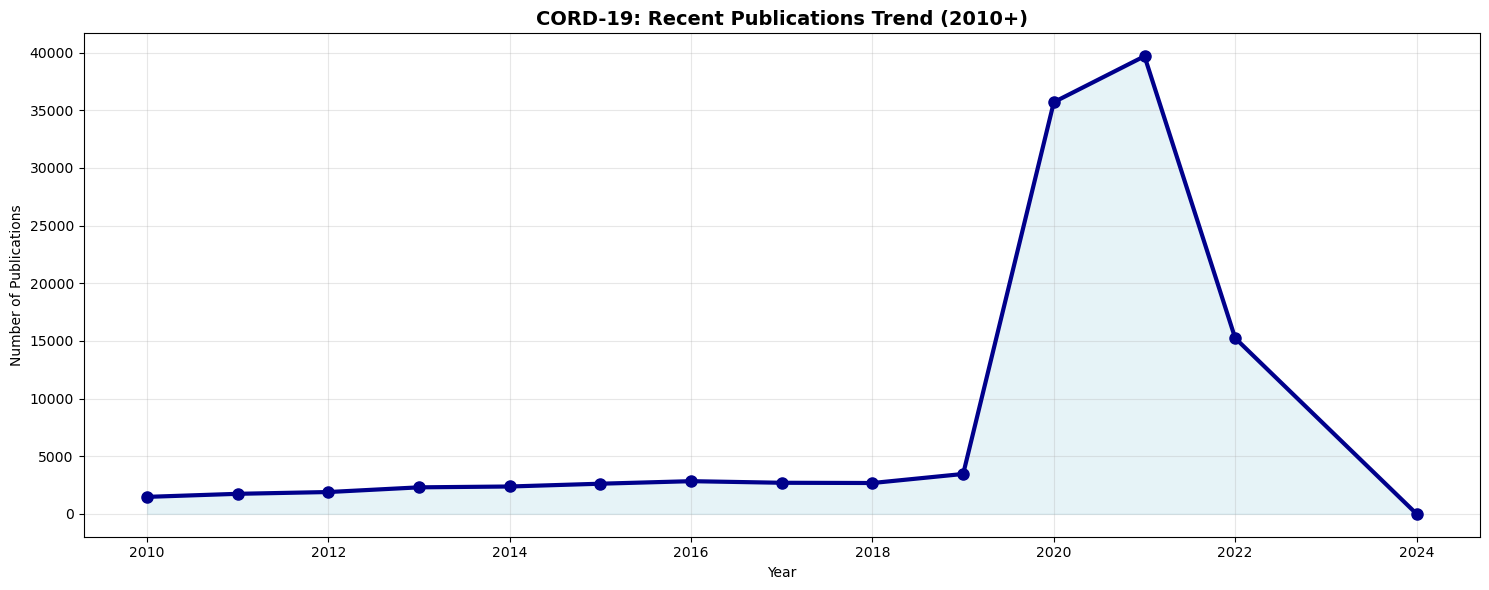


3. JOURNAL ANALYSIS
Papers with journal information: 119,330 (96.6%)
Total unique journals: 14,348
Top journal: Reactions Weekly (3,191 papers)

Top 15 Journals:
 1. Reactions Weekly: 3,191 papers (2.7%)
 2. Plos One: 1,614 papers (1.4%)
 3. Bmj: 1,030 papers (0.9%)
 4. Int J Environ Res Public Health: 917 papers (0.8%)
 5. Sci Rep: 907 papers (0.8%)
 6. Nature: 663 papers (0.6%)
 7. Front Psychol: 634 papers (0.5%)
 8. Innov Aging: 629 papers (0.5%)
 9. Int J Mol Sci: 564 papers (0.5%)
10. Lancet: 558 papers (0.5%)
11. Front Immunol: 527 papers (0.4%)
12. Computational Science And Its Applications - Iccsa 2020: 500 papers (0.4%)
13. Open Forum Infect Dis: 483 papers (0.4%)
14. Nat Commun: 476 papers (0.4%)
15. Bmj Open: 465 papers (0.4%)


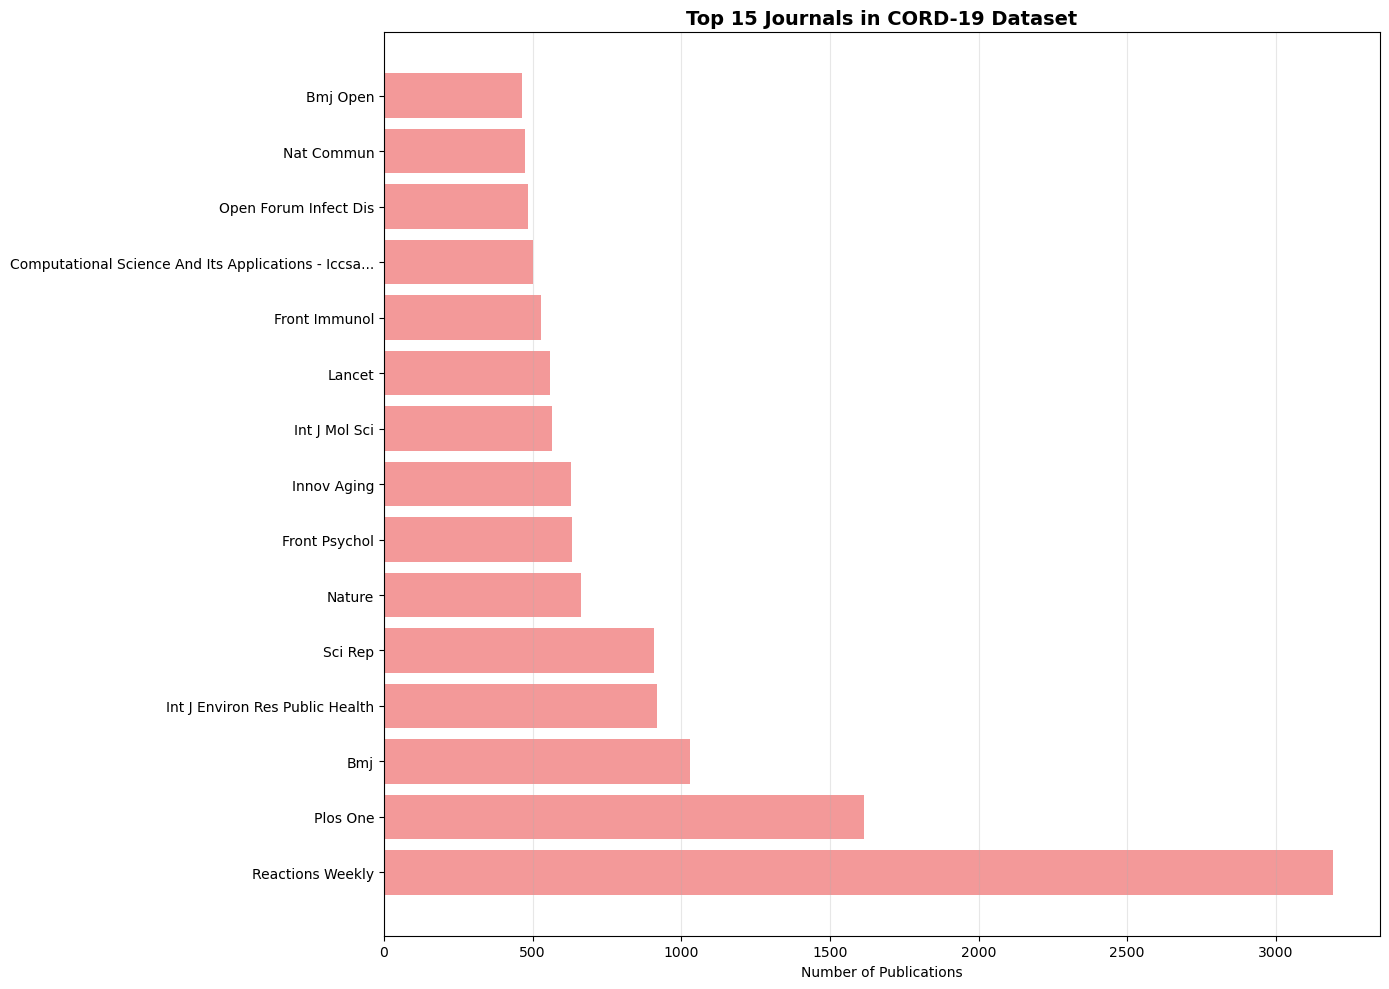

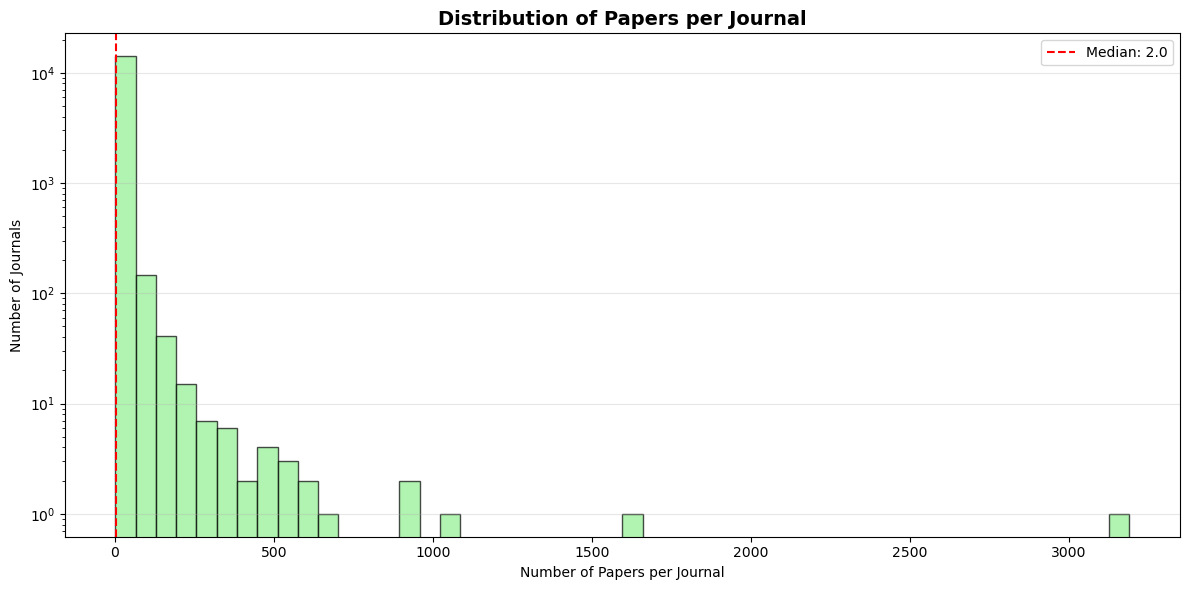

Journals with only 1 paper: 5,397 (37.6%)

4. TITLE ANALYSIS
Papers with titles: 123,372 (99.9%)
Average title length: 92.2 characters
Median title length: 90.0 characters
Longest title: 1504 characters
Shortest title: 3 characters


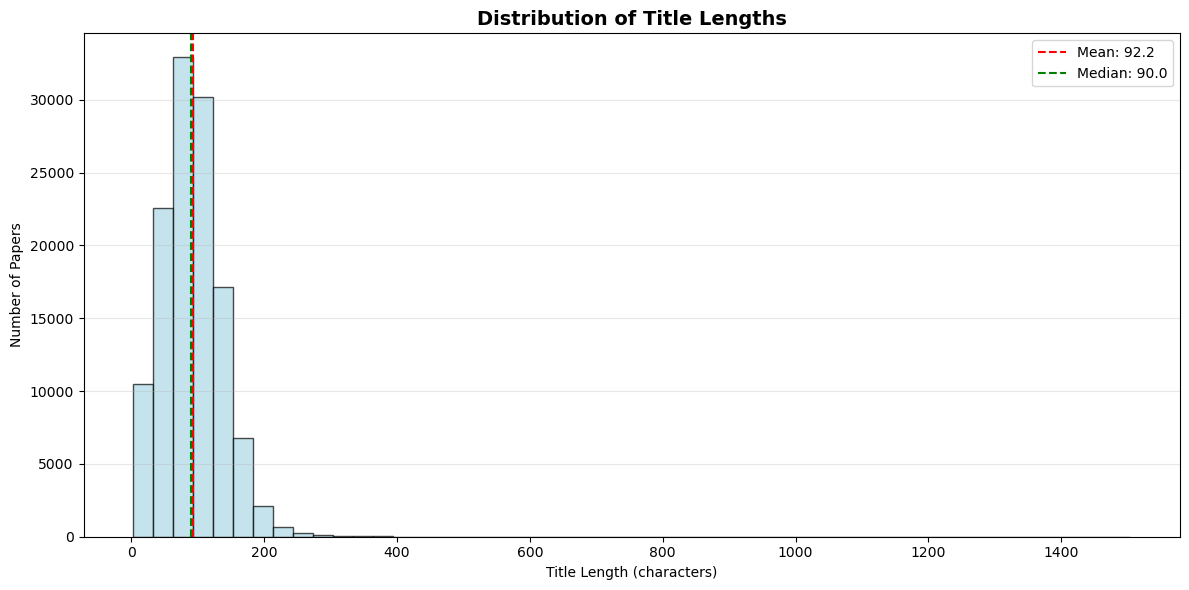


--- Most Common Words in Titles ---
 1. covid: 17,036
 2. patients: 7,233
 3. study: 6,871
 4. health: 6,383
 5. pandemic: 5,813
 6. case: 5,640
 7. review: 5,438
 8. analysis: 5,215
 9. based: 4,854
10. disease: 4,760
11. care: 4,539
12. virus: 4,300
13. report: 3,700
14. using: 3,639
15. infection: 3,632
16. clinical: 3,562
17. acute: 3,281
18. treatment: 3,225
19. cancer: 3,040
20. systematic: 2,942
21. respiratory: 2,924
22. use: 2,849
23. human: 2,777
24. cell: 2,761
25. sars: 2,714


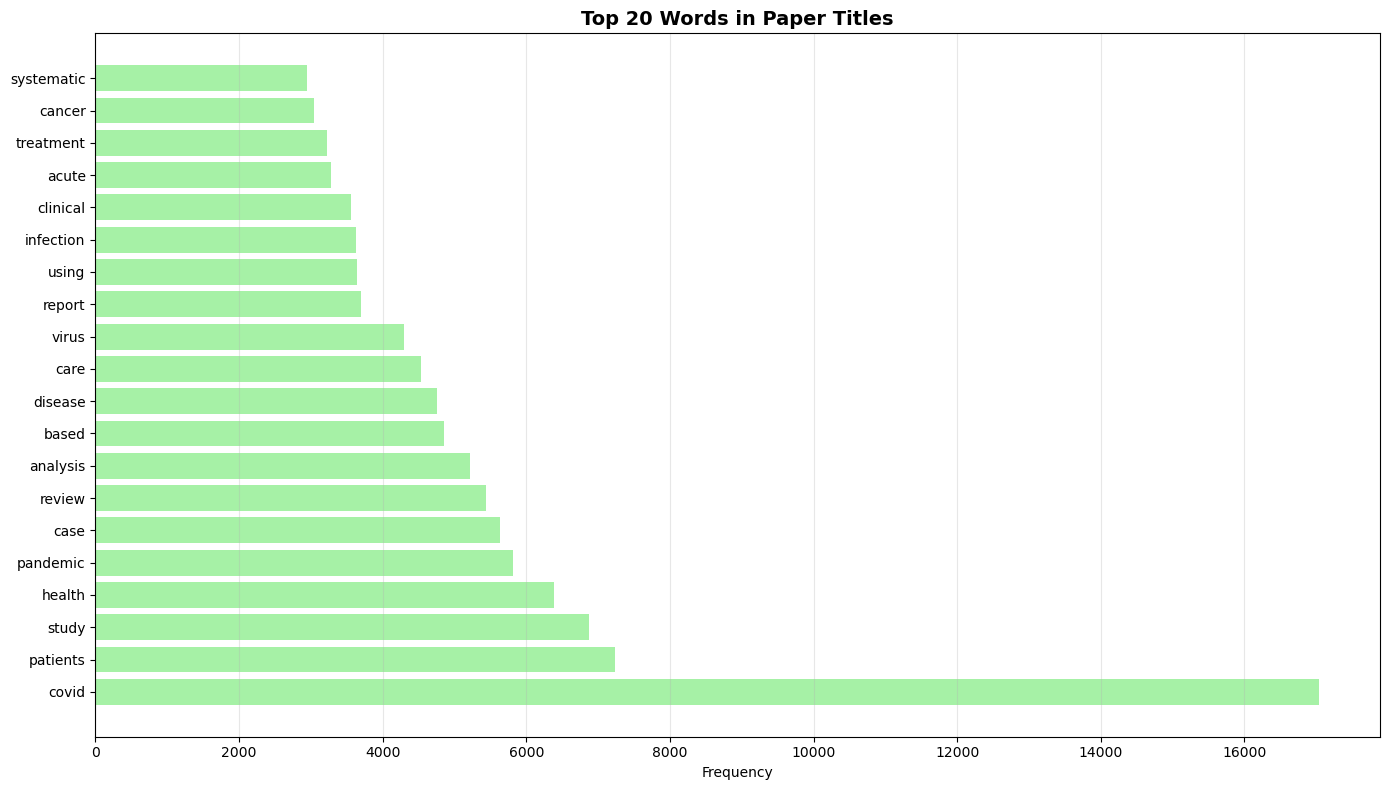


5. ABSTRACT ANALYSIS
Papers with abstracts: 88,843 (71.9%)
Average abstract length: 1450.8 characters
Median abstract length: 1436.0 characters
Longest abstract: 122,392 characters
Shortest abstract: 1 characters


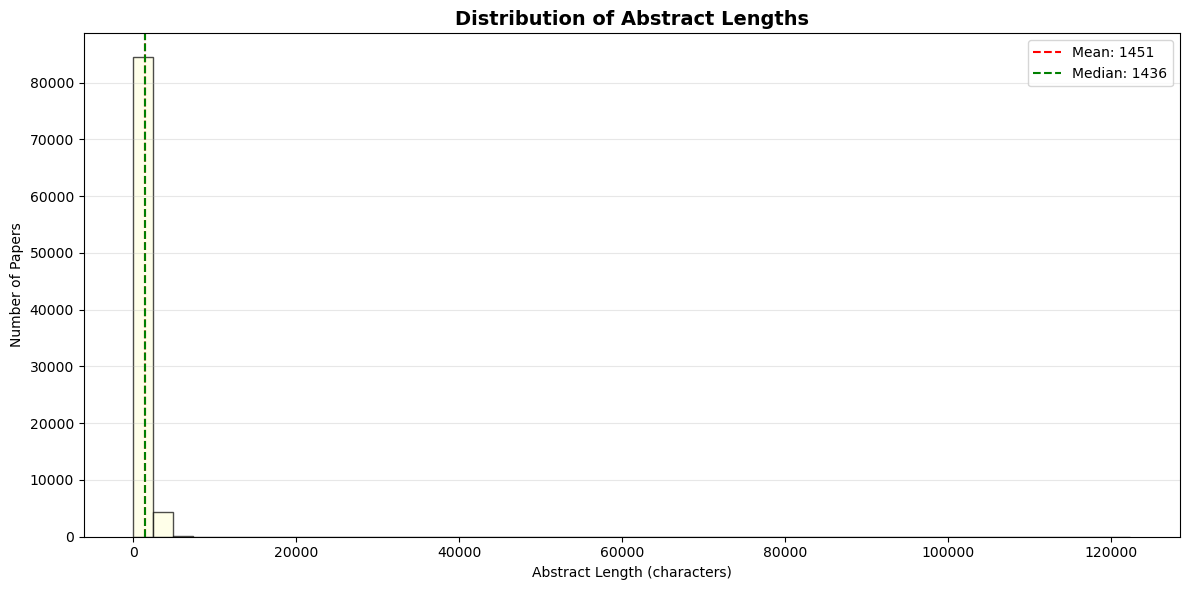


6. AUTHOR ANALYSIS
Papers with author information: 113,162 (91.6%)
Average authors per paper: 5.5
Median authors per paper: 4.0
Maximum authors in a single paper: 3572
Single-author papers: 19,233 (17.0%)


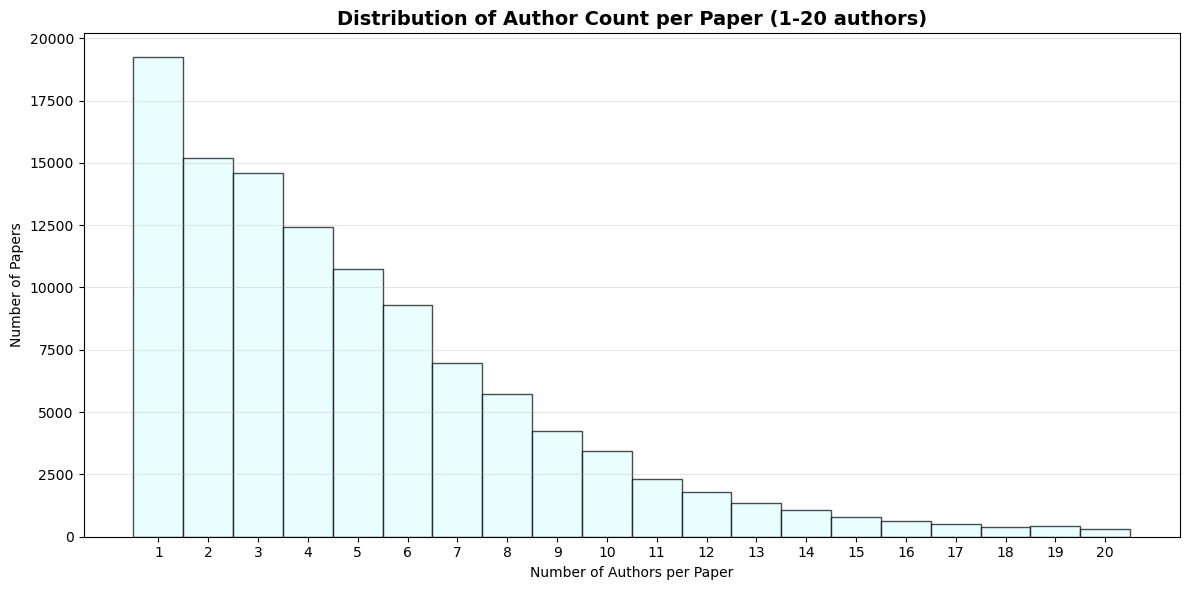


7. DATA SOURCE ANALYSIS
Data Sources:
  PMC: 79,535 papers (64.4%)
  Medline: 44,009 papers (35.6%)


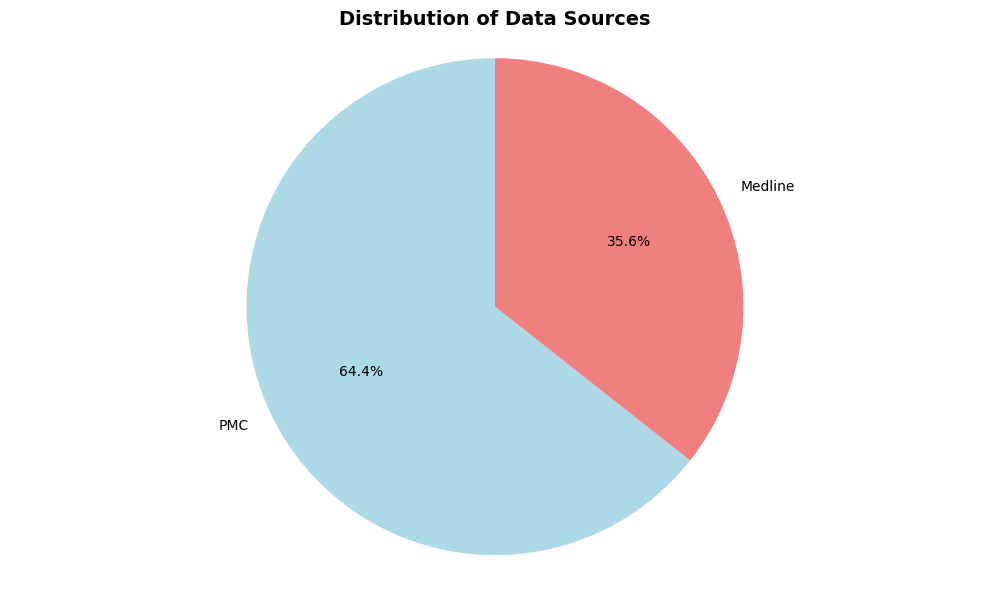


8. FILE AVAILABILITY ANALYSIS
Papers with PDF JSON files: 58,333 (47.2%)
Papers with PMC JSON files: 55,421 (44.9%)
Papers with both file types: 49,742 (40.3%)
Papers with either file type: 64,012 (51.8%)

CORD-19 DATASET SUMMARY
📊 Total Papers: 123,544
📅 Publication Years: 1990 - 2024
📚 Unique Journals: 14,348
👥 Papers with Authors: 113,162 (91.6%)
📄 Papers with Abstracts: 88,843 (71.9%)
🗂️ Papers with Full Text: 64,012 (51.8%)
💾 Memory Usage: 332.6 MB


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set up matplotlib for better plots
plt.style.use('default')
sns.set_palette("husl")

# Assuming df is already loaded (as shown in your output)
print("=== CORD-19 Dataset Comprehensive Analysis ===")
print(f"Dataset successfully loaded: {df.shape[0]:,} papers, {df.shape[1]} columns")

# Part 1: Data Quality Assessment
print("\n1. DATA QUALITY ASSESSMENT")
print("=" * 50)

# Missing values analysis with visualization
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0].to_string(index=False))

# Visualize missing data
plt.figure(figsize=(14, 8))
missing_cols = missing_df[missing_df['Missing_Count'] > 0]
plt.barh(range(len(missing_cols)), missing_cols['Missing_Percentage'], 
         color='lightcoral', alpha=0.7)
plt.yticks(range(len(missing_cols)), missing_cols['Column'])
plt.xlabel('Missing Percentage (%)')
plt.title('Missing Data by Column', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Part 2: Publication Timeline Analysis
print("\n2. PUBLICATION TIMELINE ANALYSIS")
print("=" * 50)

# Clean and extract publication years
def extract_year_robust(date_str):
    """Extract year from various date formats"""
    if pd.isna(date_str) or str(date_str) == 'nan' or str(date_str) == '':
        return None
    
    date_str = str(date_str).strip()
    
    # Try different date patterns
    patterns = [
        r'\b(20[0-2][0-9])\b',  # 2000-2029
        r'\b(19[8-9][0-9])\b',  # 1980-1999
        r'\b(20[0-2][0-9])-\d{2}-\d{2}\b',  # YYYY-MM-DD
        r'\b(19[8-9][0-9])-\d{2}-\d{2}\b'   # YYYY-MM-DD
    ]
    
    for pattern in patterns:
        match = re.search(pattern, date_str)
        if match:
            year = int(match.group(1))
            if 1990 <= year <= 2024:  # Reasonable range for research papers
                return year
    
    return None

df['publication_year'] = df['publish_time'].apply(extract_year_robust)
years_available = df['publication_year'].notna().sum()

print(f"Papers with extractable publication years: {years_available:,} ({years_available/len(df)*100:.1f}%)")

if years_available > 0:
    year_counts = df['publication_year'].value_counts().sort_index()
    print(f"Publication year range: {int(year_counts.index.min())} - {int(year_counts.index.max())}")
    print(f"Peak publication year: {int(year_counts.idxmax())} ({year_counts.max():,} papers)")
    
    # Plot publication timeline
    plt.figure(figsize=(15, 6))
    year_counts.plot(kind='bar', color='skyblue', alpha=0.8, width=0.8)
    plt.title('CORD-19: Publications by Year', fontsize=14, fontweight='bold')
    plt.xlabel('Publication Year')
    plt.ylabel('Number of Publications')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Focus on 2010+ for better detail
    recent_years = year_counts[year_counts.index >= 2010]
    if len(recent_years) > 0:
        plt.figure(figsize=(15, 6))
        recent_years.plot(kind='line', marker='o', linewidth=3, markersize=8, color='darkblue')
        plt.fill_between(recent_years.index, recent_years.values, alpha=0.3, color='lightblue')
        plt.title('CORD-19: Recent Publications Trend (2010+)', fontsize=14, fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Number of Publications')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

# Part 3: Journal Analysis
print("\n3. JOURNAL ANALYSIS")
print("=" * 50)

journals_available = df['journal'].notna().sum()
print(f"Papers with journal information: {journals_available:,} ({journals_available/len(df)*100:.1f}%)")

if journals_available > 0:
    # Clean journal names
    df['journal_clean'] = df['journal'].str.strip().str.title()
    
    # Top journals analysis
    top_journals = df['journal_clean'].value_counts().head(20)
    unique_journals = df['journal_clean'].nunique()
    
    print(f"Total unique journals: {unique_journals:,}")
    print(f"Top journal: {top_journals.index[0]} ({top_journals.iloc[0]:,} papers)")
    
    print("\nTop 15 Journals:")
    for i, (journal, count) in enumerate(top_journals.head(15).items(), 1):
        percentage = (count / journals_available) * 100
        print(f"{i:2d}. {journal}: {count:,} papers ({percentage:.1f}%)")
    
    # Plot top journals
    plt.figure(figsize=(14, 10))
    top_15 = top_journals.head(15)
    plt.barh(range(len(top_15)), top_15.values, color='lightcoral', alpha=0.8)
    plt.yticks(range(len(top_15)), [j[:50] + '...' if len(j) > 50 else j for j in top_15.index])
    plt.xlabel('Number of Publications')
    plt.title('Top 15 Journals in CORD-19 Dataset', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Journal diversity analysis
    journal_counts = df['journal_clean'].value_counts()
    single_paper_journals = (journal_counts == 1).sum()
    
    plt.figure(figsize=(12, 6))
    plt.hist(journal_counts.values, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.xlabel('Number of Papers per Journal')
    plt.ylabel('Number of Journals')
    plt.title('Distribution of Papers per Journal', fontsize=14, fontweight='bold')
    plt.yscale('log')
    plt.grid(axis='y', alpha=0.3)
    plt.axvline(journal_counts.median(), color='red', linestyle='--', 
               label=f'Median: {journal_counts.median():.1f}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"Journals with only 1 paper: {single_paper_journals:,} ({single_paper_journals/unique_journals*100:.1f}%)")

# Part 4: Text Analysis - Titles
print("\n4. TITLE ANALYSIS")
print("=" * 50)

titles_available = df['title'].notna().sum()
print(f"Papers with titles: {titles_available:,} ({titles_available/len(df)*100:.1f}%)")

if titles_available > 0:
    # Title length analysis
    df['title_length'] = df['title'].astype(str).apply(len)
    valid_titles = df[df['title'].notna()]['title_length']
    
    print(f"Average title length: {valid_titles.mean():.1f} characters")
    print(f"Median title length: {valid_titles.median():.1f} characters")
    print(f"Longest title: {valid_titles.max()} characters")
    print(f"Shortest title: {valid_titles.min()} characters")
    
    # Plot title length distribution
    plt.figure(figsize=(12, 6))
    plt.hist(valid_titles, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
    plt.axvline(valid_titles.mean(), color='red', linestyle='--', 
               label=f'Mean: {valid_titles.mean():.1f}')
    plt.axvline(valid_titles.median(), color='green', linestyle='--', 
               label=f'Median: {valid_titles.median():.1f}')
    plt.xlabel('Title Length (characters)')
    plt.ylabel('Number of Papers')
    plt.title('Distribution of Title Lengths', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Common words in titles
    print("\n--- Most Common Words in Titles ---")
    all_titles = df['title'].dropna().astype(str).str.lower()
    
    # Enhanced stop words list
    stop_words = {
        'the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by',
        'a', 'an', 'is', 'are', 'was', 'were', 'been', 'be', 'have', 'has', 'had',
        'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might',
        'must', 'shall', 'can', 'cannot', 'from', 'up', 'out', 'if', 'about',
        'into', 'through', 'during', 'before', 'after', 'above', 'below', 'between',
        'among', 'within', 'without', 'under', 'over', 'again', 'further', 'then',
        'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'both',
        'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',
        'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very'
    }
    
    all_words = []
    for title in all_titles:
        # Extract words, remove punctuation
        words = re.findall(r'\b[a-zA-Z]+\b', title)
        all_words.extend([word for word in words if len(word) > 2 and word not in stop_words])
    
    word_freq = Counter(all_words)
    top_words = word_freq.most_common(25)
    
    for i, (word, count) in enumerate(top_words, 1):
        print(f"{i:2d}. {word}: {count:,}")
    
    # Plot top words
    words, counts = zip(*top_words[:20])
    plt.figure(figsize=(14, 8))
    plt.barh(range(len(words)), counts, color='lightgreen', alpha=0.8)
    plt.yticks(range(len(words)), words)
    plt.xlabel('Frequency')
    plt.title('Top 20 Words in Paper Titles', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Part 5: Abstract Analysis
print("\n5. ABSTRACT ANALYSIS")
print("=" * 50)

# Filter out missing abstracts properly
abstracts_with_content = df['abstract'].dropna()
abstracts_with_content = abstracts_with_content[abstracts_with_content.astype(str) != 'nan']
abstracts_available = len(abstracts_with_content)

print(f"Papers with abstracts: {abstracts_available:,} ({abstracts_available/len(df)*100:.1f}%)")

if abstracts_available > 0:
    # Abstract length analysis
    abstract_lengths = abstracts_with_content.astype(str).apply(len)
    
    print(f"Average abstract length: {abstract_lengths.mean():.1f} characters")
    print(f"Median abstract length: {abstract_lengths.median():.1f} characters")
    print(f"Longest abstract: {abstract_lengths.max():,} characters")
    print(f"Shortest abstract: {abstract_lengths.min()} characters")
    
    # Plot abstract length distribution
    plt.figure(figsize=(12, 6))
    plt.hist(abstract_lengths, bins=50, alpha=0.7, color='lightyellow', edgecolor='black')
    plt.axvline(abstract_lengths.mean(), color='red', linestyle='--', 
               label=f'Mean: {abstract_lengths.mean():.0f}')
    plt.axvline(abstract_lengths.median(), color='green', linestyle='--', 
               label=f'Median: {abstract_lengths.median():.0f}')
    plt.xlabel('Abstract Length (characters)')
    plt.ylabel('Number of Papers')
    plt.title('Distribution of Abstract Lengths', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Part 6: Author Analysis
print("\n6. AUTHOR ANALYSIS")
print("=" * 50)

authors_available = df['authors'].notna().sum()
print(f"Papers with author information: {authors_available:,} ({authors_available/len(df)*100:.1f}%)")

if authors_available > 0:
    # Count authors per paper
    def count_authors(author_string):
        if pd.isna(author_string) or str(author_string) == 'nan':
            return 0
        # Split by semicolon and clean
        authors = str(author_string).split(';')
        return len([a.strip() for a in authors if a.strip()])
    
    df['author_count'] = df['authors'].apply(count_authors)
    valid_author_counts = df[df['author_count'] > 0]['author_count']
    
    print(f"Average authors per paper: {valid_author_counts.mean():.1f}")
    print(f"Median authors per paper: {valid_author_counts.median():.1f}")
    print(f"Maximum authors in a single paper: {valid_author_counts.max()}")
    print(f"Single-author papers: {(valid_author_counts == 1).sum():,} ({(valid_author_counts == 1).sum()/len(valid_author_counts)*100:.1f}%)")
    
    # Plot author count distribution
    plt.figure(figsize=(12, 6))
    max_authors_to_show = min(20, valid_author_counts.max())
    author_counts_limited = valid_author_counts[valid_author_counts <= max_authors_to_show]
    
    plt.hist(author_counts_limited, bins=range(1, max_authors_to_show + 2), 
             alpha=0.7, color='lightcyan', edgecolor='black', align='left')
    plt.xlabel('Number of Authors per Paper')
    plt.ylabel('Number of Papers')
    plt.title(f'Distribution of Author Count per Paper (1-{max_authors_to_show} authors)', 
              fontsize=14, fontweight='bold')
    plt.xticks(range(1, max_authors_to_show + 1))
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Part 7: Data Source Analysis
print("\n7. DATA SOURCE ANALYSIS")
print("=" * 50)

if 'source_x' in df.columns:
    source_counts = df['source_x'].value_counts()
    print("Data Sources:")
    for source, count in source_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {source}: {count:,} papers ({percentage:.1f}%)")
    
    # Plot source distribution
    plt.figure(figsize=(10, 6))
    plt.pie(source_counts.values, labels=source_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen', 'lightyellow'])
    plt.title('Distribution of Data Sources', fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Part 8: File Availability Analysis
print("\n8. FILE AVAILABILITY ANALYSIS")
print("=" * 50)

pdf_available = df['pdf_json_files'].notna().sum()
pmc_available = df['pmc_json_files'].notna().sum()
both_available = ((df['pdf_json_files'].notna()) & (df['pmc_json_files'].notna())).sum()
either_available = ((df['pdf_json_files'].notna()) | (df['pmc_json_files'].notna())).sum()

print(f"Papers with PDF JSON files: {pdf_available:,} ({pdf_available/len(df)*100:.1f}%)")
print(f"Papers with PMC JSON files: {pmc_available:,} ({pmc_available/len(df)*100:.1f}%)")
print(f"Papers with both file types: {both_available:,} ({both_available/len(df)*100:.1f}%)")
print(f"Papers with either file type: {either_available:,} ({either_available/len(df)*100:.1f}%)")

# Final Summary
print("\n" + "="*70)
print("CORD-19 DATASET SUMMARY")
print("="*70)
print(f"📊 Total Papers: {len(df):,}")
print(f"📅 Publication Years: {int(df['publication_year'].min()) if df['publication_year'].notna().any() else 'N/A'} - {int(df['publication_year'].max()) if df['publication_year'].notna().any() else 'N/A'}")
print(f"📚 Unique Journals: {df['journal_clean'].nunique() if 'journal_clean' in df.columns else 'N/A':,}")
print(f"👥 Papers with Authors: {authors_available:,} ({authors_available/len(df)*100:.1f}%)")
print(f"📄 Papers with Abstracts: {abstracts_available:,} ({abstracts_available/len(df)*100:.1f}%)")
print(f"🗂️ Papers with Full Text: {either_available:,} ({either_available/len(df)*100:.1f}%)")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print("="*70)

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ee/d3/67ccdab9d2756f8b30b0669015840cd5fdb5f062a2d621d67f033cf3dd54/wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 9.3 MB/s eta 0:00:00 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
CORD-19 DATASET ANALYSIS
This script will:
1. Load the CORD-19 metadata
2. Perform basic analysis
3. Create visualizations
Loading CORD-19 dataset...
Standard loading failed, using alternative method...
⚠️  Skipped some problematic rows during loading
✅ Successfully loaded 123,544 papers

BASIC ANALYSIS OF CORD-19 DATASET

1. 📅 PAPERS BY PUBLICATION YEAR
----------------------------------------
Papers with valid publication years

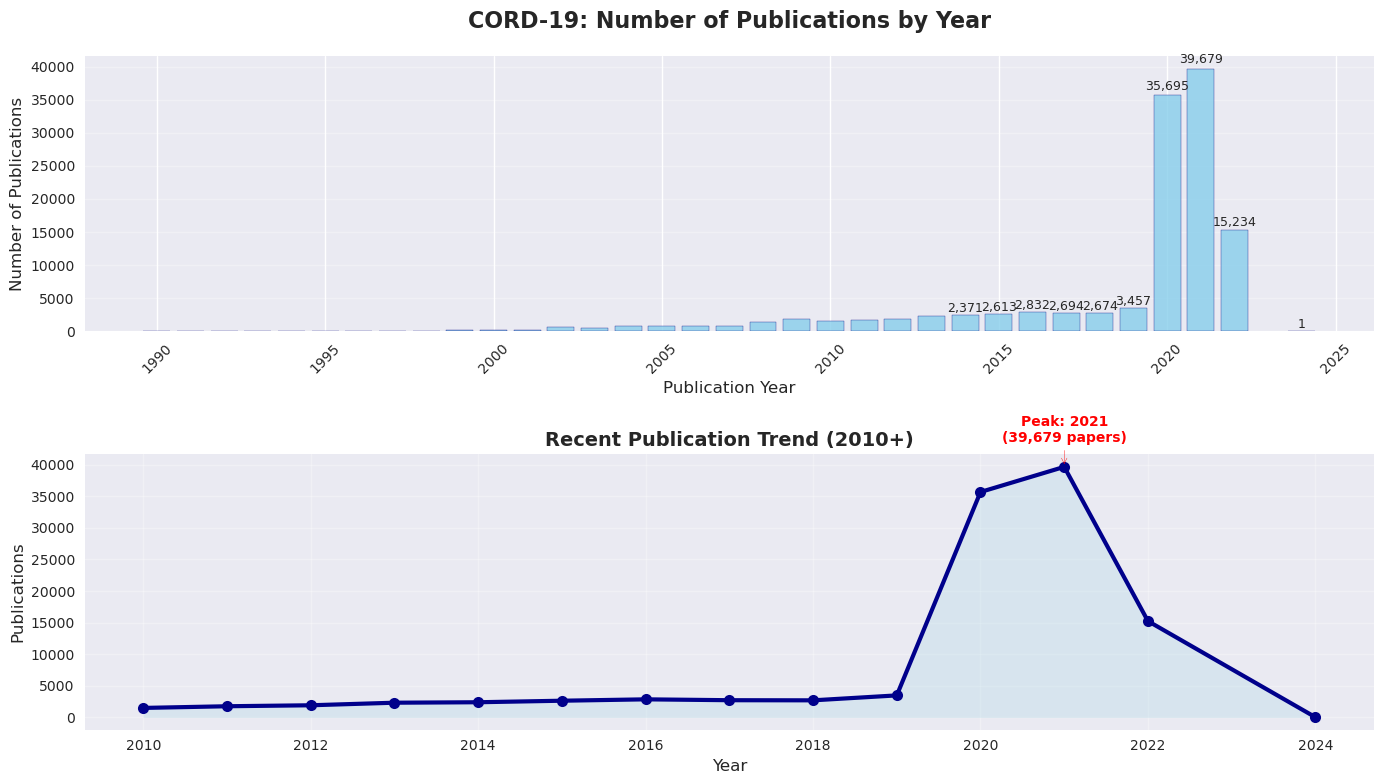

✅ Publication timeline plot created

2. 📊 Creating top journals bar chart...


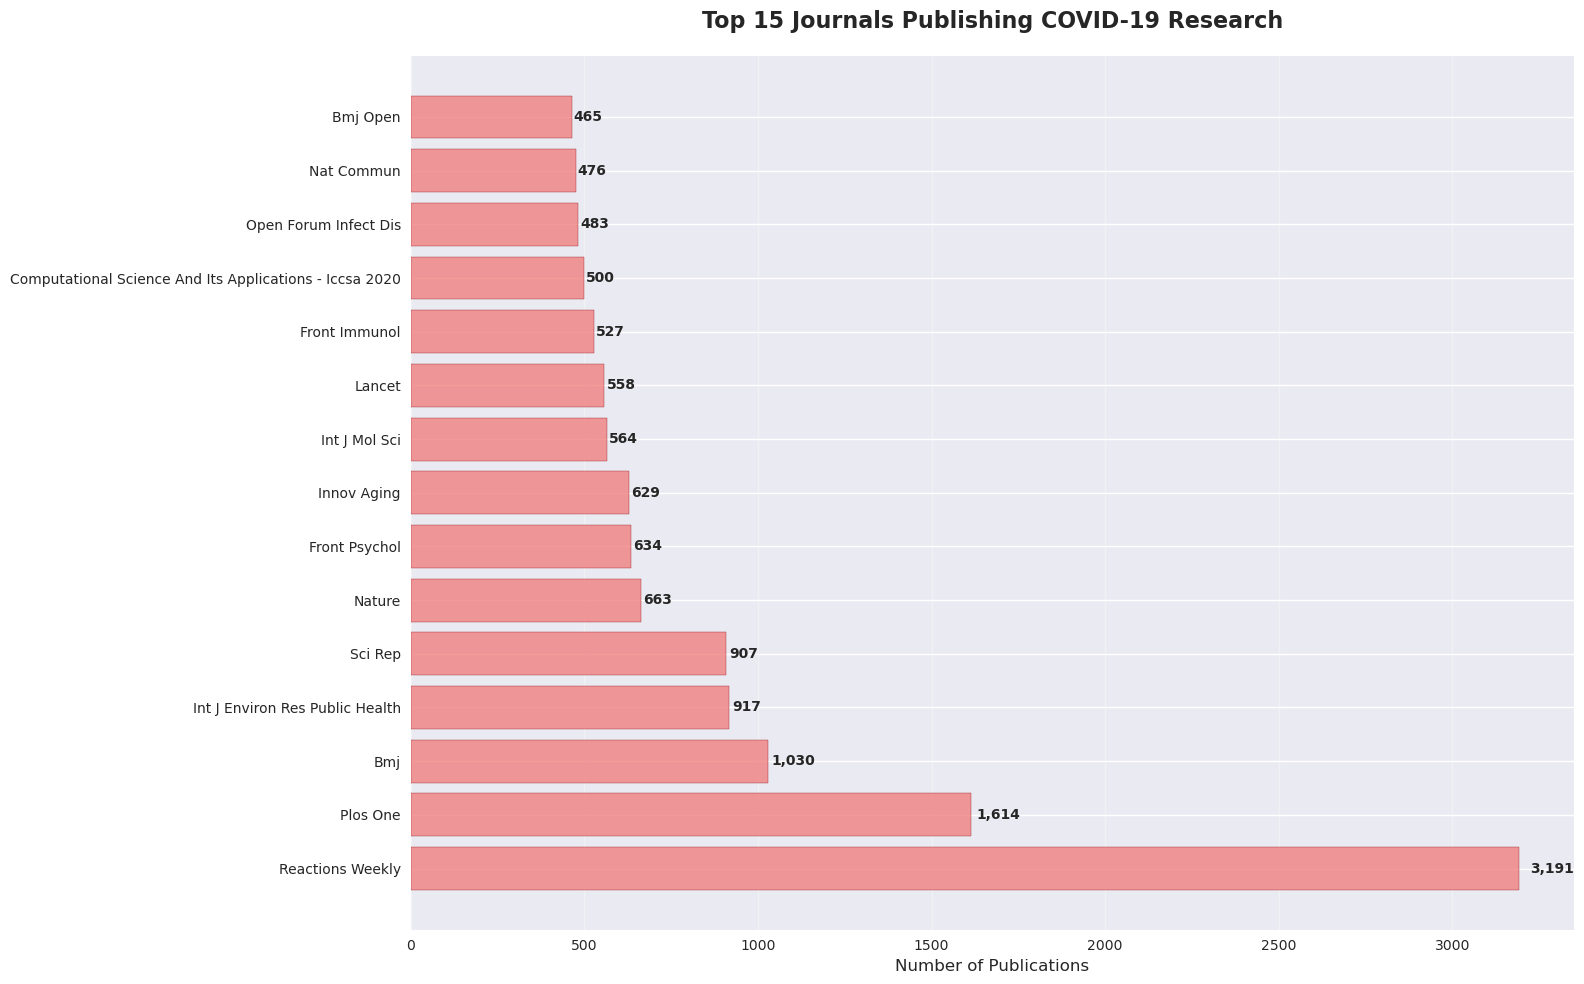

✅ Top journals bar chart created

3. ☁️ Creating word cloud of paper titles...


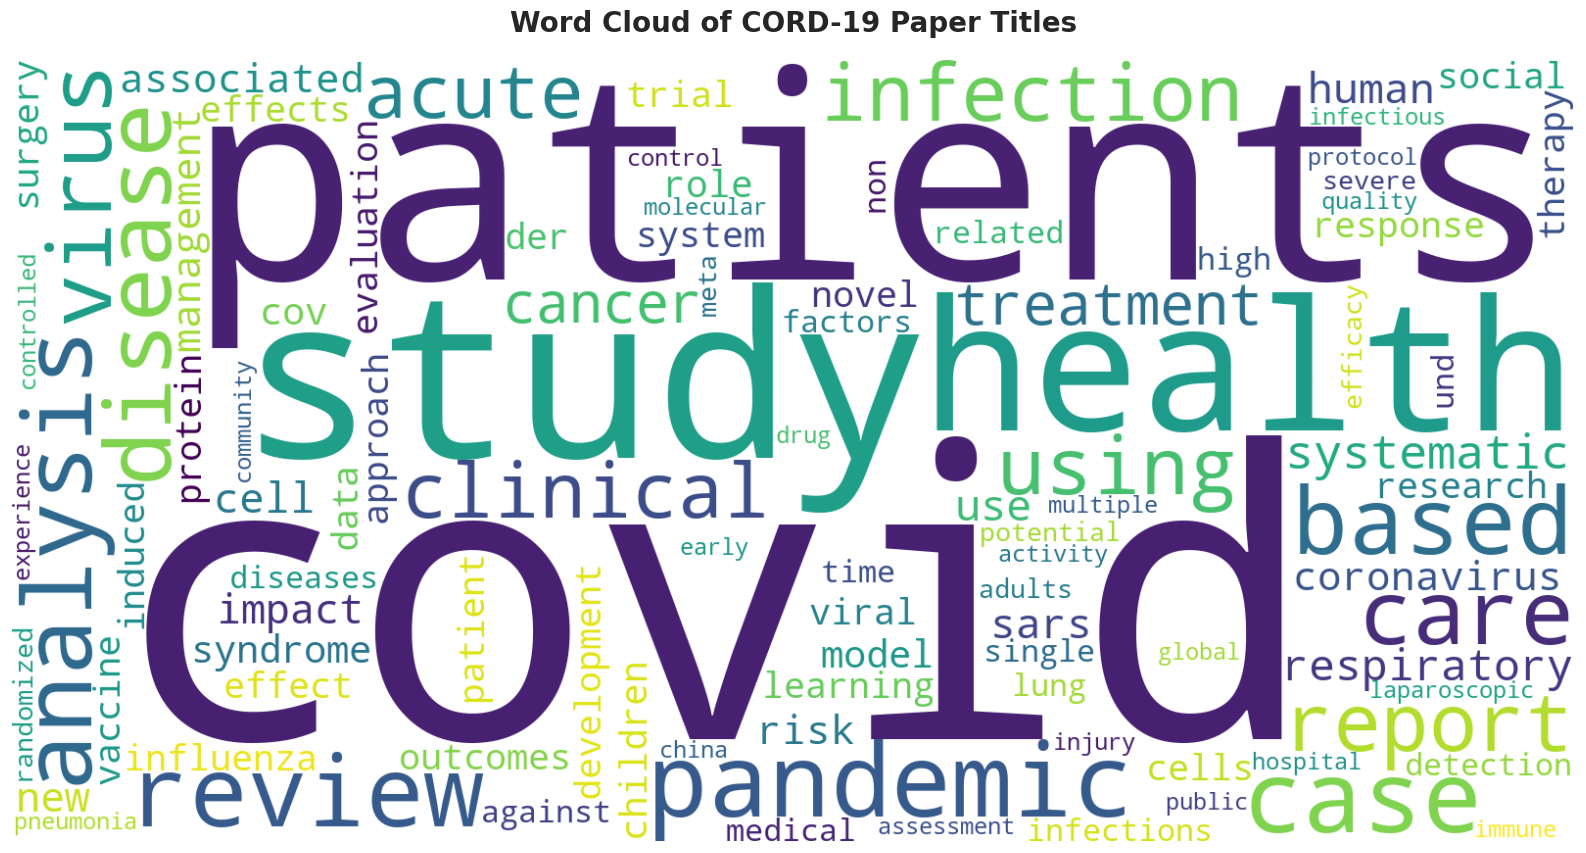

✅ Word cloud created

4. 🗂️ Creating paper distribution by source...


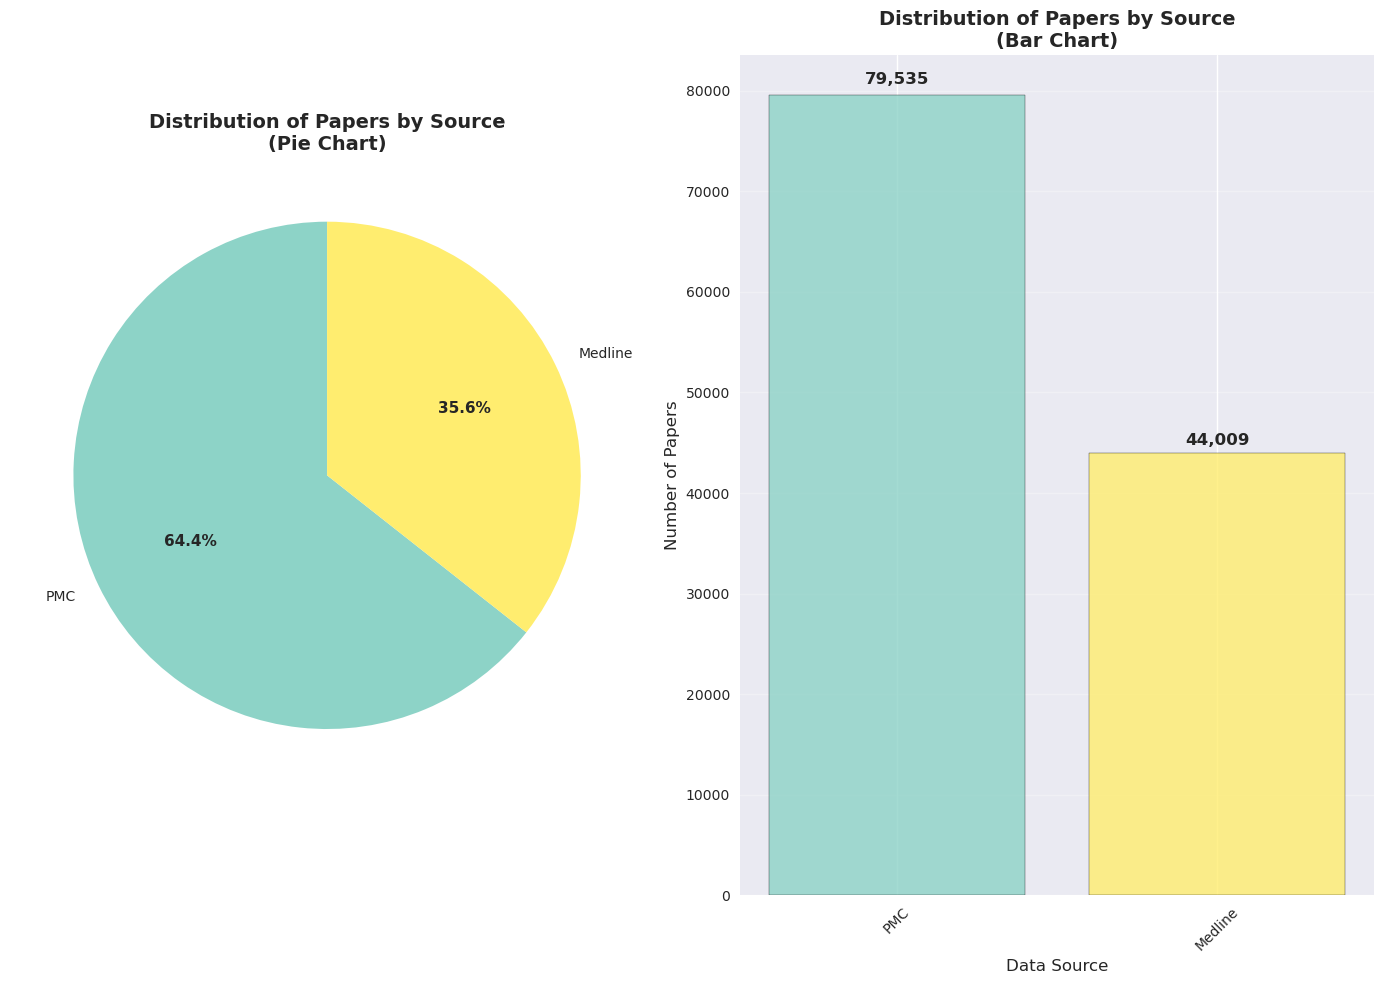


Source distribution:
1. PMC: 79,535 papers (64.4%)
2. Medline: 44,009 papers (35.6%)
✅ Source distribution plots created

ALL VISUALIZATIONS COMPLETED!

🎉 Analysis complete! Processed 123,544 research papers.
All plots have been displayed. Check the output above for detailed statistics.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandas matplotlib seaborn wordcloud numpy
from collections import Counter
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

def load_cord19_data():
    """Load CORD-19 dataset with error handling"""
    try:
        print("Loading CORD-19 dataset...")
        # Try standard loading first
        try:
            df = pd.read_csv('metadata.csv')
        except pd.errors.ParserError:
            print("Standard loading failed, using alternative method...")
            # Skip problematic rows if standard loading fails
            skiprows = list(range(123545, 123550))
            df = pd.read_csv('metadata.csv', skiprows=skiprows, on_bad_lines='skip')
            print("⚠️  Skipped some problematic rows during loading")
        
        print(f"✅ Successfully loaded {len(df):,} papers")
        return df
    
    except FileNotFoundError:
        print("❌ Error: 'metadata.csv' file not found.")
        print("Please ensure the CORD-19 metadata.csv file is in the current directory.")
        return None
    except Exception as e:
        print(f"❌ Error loading data: {str(e)}")
        return None

def extract_publication_year(date_str):
    """Extract publication year from date string"""
    if pd.isna(date_str) or str(date_str) == 'nan':
        return None
    
    # Try to extract 4-digit year
    year_match = re.search(r'\b(19|20)\d{2}\b', str(date_str))
    if year_match:
        year = int(year_match.group())
        # Filter reasonable years for academic papers
        if 1990 <= year <= 2024:
            return year
    return None

def basic_analysis(df):
    """Perform basic analysis on the CORD-19 dataset"""
    print("\n" + "="*60)
    print("BASIC ANALYSIS OF CORD-19 DATASET")
    print("="*60)
    
    # 1. Count papers by publication year
    print("\n1. 📅 PAPERS BY PUBLICATION YEAR")
    print("-" * 40)
    
    # Extract publication years
    df['publication_year'] = df['publish_time'].apply(extract_publication_year)
    
    papers_with_years = df['publication_year'].notna().sum()
    print(f"Papers with valid publication years: {papers_with_years:,} ({papers_with_years/len(df)*100:.1f}%)")
    
    if papers_with_years > 0:
        year_counts = df['publication_year'].value_counts().sort_index()
        print(f"Publication year range: {int(year_counts.index.min())} - {int(year_counts.index.max())}")
        
        print("\nTop 10 years by publication count:")
        top_years = year_counts.sort_values(ascending=False).head(10)
        for i, (year, count) in enumerate(top_years.items(), 1):
            print(f"{i:2d}. {int(year)}: {count:,} papers")
    
    # 2. Identify top journals publishing COVID-19 research
    print("\n2. 📚 TOP JOURNALS PUBLISHING COVID-19 RESEARCH")
    print("-" * 50)
    
    journals_with_data = df['journal'].notna().sum()
    print(f"Papers with journal information: {journals_with_data:,} ({journals_with_data/len(df)*100:.1f}%)")
    
    if journals_with_data > 0:
        # Clean journal names
        df['journal_clean'] = df['journal'].str.strip().str.title()
        
        journal_counts = df['journal_clean'].value_counts()
        unique_journals = len(journal_counts)
        
        print(f"Total unique journals: {unique_journals:,}")
        print(f"Most prolific journal: {journal_counts.index[0]} ({journal_counts.iloc[0]:,} papers)")
        
        print("\nTop 15 journals:")
        for i, (journal, count) in enumerate(journal_counts.head(15).items(), 1):
            percentage = (count / journals_with_data) * 100
            print(f"{i:2d}. {journal[:60]}: {count:,} papers ({percentage:.1f}%)")
    
    # 3. Find most frequent words in titles
    print("\n3. 🔤 MOST FREQUENT WORDS IN TITLES")
    print("-" * 40)
    
    titles_available = df['title'].notna().sum()
    print(f"Papers with titles: {titles_available:,} ({titles_available/len(df)*100:.1f}%)")
    
    if titles_available > 0:
        # Extract all words from titles
        all_titles = df['title'].dropna().astype(str).str.lower()
        
        # Enhanced stop words list
        stop_words = {
            'the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by',
            'a', 'an', 'is', 'are', 'was', 'were', 'been', 'be', 'have', 'has', 'had',
            'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might',
            'must', 'shall', 'can', 'cannot', 'from', 'up', 'out', 'if', 'about',
            'into', 'through', 'during', 'before', 'after', 'above', 'below', 'between',
            'among', 'within', 'without', 'under', 'over', 'again', 'further', 'then',
            'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'both',
            'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',
            'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 'just',
            'now', 'also', 'its', 'his', 'her', 'their', 'our', 'your', 'my',
            'this', 'that', 'these', 'those', 'what', 'which', 'who', 'whom', 'whose'
        }
        
        all_words = []
        for title in all_titles:
            # Extract words using regex (letters only)
            words = re.findall(r'\b[a-zA-Z]+\b', title)
            # Filter out short words and stop words
            filtered_words = [word for word in words if len(word) > 2 and word not in stop_words]
            all_words.extend(filtered_words)
        
        word_freq = Counter(all_words)
        total_words = len(all_words)
        unique_words = len(word_freq)
        
        print(f"Total words extracted: {total_words:,}")
        print(f"Unique words: {unique_words:,}")
        
        print("\nTop 20 most frequent words:")
        for i, (word, count) in enumerate(word_freq.most_common(20), 1):
            percentage = (count / total_words) * 100
            print(f"{i:2d}. {word}: {count:,} occurrences ({percentage:.2f}%)")
        
        # Store for visualization
        df.word_frequencies = word_freq
    
    return df

def create_visualizations(df):
    """Create all required visualizations"""
    print("\n" + "="*60)
    print("CREATING VISUALIZATIONS")
    print("="*60)
    
    # 1. Plot number of publications over time
    print("\n1. 📈 Creating publication timeline plot...")
    
    if 'publication_year' in df.columns and df['publication_year'].notna().sum() > 0:
        year_counts = df['publication_year'].value_counts().sort_index()
        
        plt.figure(figsize=(14, 8))
        
        # Main timeline plot
        plt.subplot(2, 1, 1)
        bars = plt.bar(year_counts.index, year_counts.values, alpha=0.8, color='skyblue', edgecolor='navy')
        plt.title('CORD-19: Number of Publications by Year', fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Publication Year', fontsize=12)
        plt.ylabel('Number of Publications', fontsize=12)
        plt.grid(axis='y', alpha=0.3)
        
        # Add value labels on bars for recent years
        for bar in bars[-10:]:  # Label last 10 years
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{int(height):,}', ha='center', va='bottom', fontsize=9)
        
        plt.xticks(rotation=45)
        
        # Recent years trend (2010+)
        plt.subplot(2, 1, 2)
        recent_years = year_counts[year_counts.index >= 2010]
        
        if len(recent_years) > 0:
            plt.plot(recent_years.index, recent_years.values, marker='o', 
                    linewidth=3, markersize=8, color='darkblue')
            plt.fill_between(recent_years.index, recent_years.values, alpha=0.3, color='lightblue')
            plt.title('Recent Publication Trend (2010+)', fontsize=14, fontweight='bold')
            plt.xlabel('Year', fontsize=12)
            plt.ylabel('Publications', fontsize=12)
            plt.grid(True, alpha=0.3)
            
            # Annotate peak year
            peak_year = recent_years.idxmax()
            peak_count = recent_years.max()
            plt.annotate(f'Peak: {int(peak_year)}\n({peak_count:,} papers)', 
                        xy=(peak_year, peak_count), 
                        xytext=(peak_year, peak_count + peak_count*0.1),
                        arrowprops=dict(arrowstyle='->', color='red'),
                        ha='center', fontsize=10, color='red', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        print("✅ Publication timeline plot created")
    else:
        print("❌ No publication year data available")
    
    # 2. Create bar chart of top publishing journals
    print("\n2. 📊 Creating top journals bar chart...")
    
    if 'journal_clean' in df.columns and df['journal_clean'].notna().sum() > 0:
        top_journals = df['journal_clean'].value_counts().head(15)
        
        plt.figure(figsize=(16, 10))
        
        # Horizontal bar chart for better readability
        bars = plt.barh(range(len(top_journals)), top_journals.values, 
                       color='lightcoral', alpha=0.8, edgecolor='darkred')
        
        # Customize the plot
        plt.yticks(range(len(top_journals)), 
                  [journal[:60] + '...' if len(journal) > 60 else journal 
                   for journal in top_journals.index])
        plt.xlabel('Number of Publications', fontsize=12)
        plt.title('Top 15 Journals Publishing COVID-19 Research', 
                 fontsize=16, fontweight='bold', pad=20)
        plt.grid(axis='x', alpha=0.3)
        
        # Add value labels on bars
        for i, (bar, value) in enumerate(zip(bars, top_journals.values)):
            plt.text(value + value*0.01, bar.get_y() + bar.get_height()/2,
                    f'{value:,}', va='center', fontsize=10, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        print("✅ Top journals bar chart created")
    else:
        print("❌ No journal data available")
    
    # 3. Generate word cloud of paper titles
    print("\n3. ☁️ Creating word cloud of paper titles...")
    
    try:
        if hasattr(df, 'word_frequencies') and df.word_frequencies:
            # Create word cloud
            plt.figure(figsize=(16, 12))
            
            # Generate word cloud
            wordcloud = WordCloud(
                width=1600, 
                height=800,
                background_color='white',
                max_words=100,
                colormap='viridis',
                relative_scaling=0.5,
                random_state=42
            ).generate_from_frequencies(df.word_frequencies)
            
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.title('Word Cloud of CORD-19 Paper Titles', 
                     fontsize=20, fontweight='bold', pad=20)
            plt.axis('off')
            plt.tight_layout(pad=1)
            plt.show()
            print("✅ Word cloud created")
            
        else:
            print("❌ No word frequency data available for word cloud")
            
    except ImportError:
        print("❌ WordCloud library not available. Install with: pip install wordcloud")
        print("Creating alternative word frequency bar chart...")
        
        # Alternative: horizontal bar chart of top words
        if hasattr(df, 'word_frequencies') and df.word_frequencies:
            top_words = df.word_frequencies.most_common(20)
            words, counts = zip(*top_words)
            
            plt.figure(figsize=(12, 10))
            bars = plt.barh(range(len(words)), counts, color='lightgreen', alpha=0.8)
            plt.yticks(range(len(words)), words)
            plt.xlabel('Frequency', fontsize=12)
            plt.title('Top 20 Words in Paper Titles', fontsize=16, fontweight='bold', pad=20)
            plt.grid(axis='x', alpha=0.3)
            
            # Add value labels
            for bar, count in zip(bars, counts):
                plt.text(count + count*0.01, bar.get_y() + bar.get_height()/2,
                        f'{count:,}', va='center', fontsize=10)
            
            plt.tight_layout()
            plt.show()
            print("✅ Alternative word frequency chart created")
    
    # 4. Plot distribution of paper counts by source
    print("\n4. 🗂️ Creating paper distribution by source...")
    
    if 'source_x' in df.columns:
        source_counts = df['source_x'].value_counts()
        
        if len(source_counts) > 0:
            plt.figure(figsize=(14, 10))
            
            # Create both pie chart and bar chart
            plt.subplot(1, 2, 1)
            # Pie chart
            colors = plt.cm.Set3(np.linspace(0, 1, len(source_counts)))
            wedges, texts, autotexts = plt.pie(source_counts.values, 
                                              labels=source_counts.index,
                                              autopct='%1.1f%%',
                                              colors=colors,
                                              startangle=90)
            plt.title('Distribution of Papers by Source\n(Pie Chart)', 
                     fontsize=14, fontweight='bold')
            
            # Make percentage text bold and larger
            for autotext in autotexts:
                autotext.set_fontweight('bold')
                autotext.set_fontsize(11)
            
            plt.subplot(1, 2, 2)
            # Bar chart
            bars = plt.bar(source_counts.index, source_counts.values, 
                          color=colors[:len(source_counts)], alpha=0.8, edgecolor='black')
            plt.title('Distribution of Papers by Source\n(Bar Chart)', 
                     fontsize=14, fontweight='bold')
            plt.xlabel('Data Source', fontsize=12)
            plt.ylabel('Number of Papers', fontsize=12)
            plt.xticks(rotation=45)
            plt.grid(axis='y', alpha=0.3)
            
            # Add value labels on bars
            for bar, value in zip(bars, source_counts.values):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + value*0.01,
                        f'{value:,}', ha='center', va='bottom', fontweight='bold')
            
            plt.tight_layout()
            plt.show()
            
            # Print source statistics
            print("\nSource distribution:")
            total_papers = source_counts.sum()
            for i, (source, count) in enumerate(source_counts.items(), 1):
                percentage = (count / total_papers) * 100
                print(f"{i}. {source}: {count:,} papers ({percentage:.1f}%)")
            
            print("✅ Source distribution plots created")
        else:
            print("❌ No source data available")
    else:
        print("❌ No 'source_x' column found in dataset")
    
    print("\n" + "="*60)
    print("ALL VISUALIZATIONS COMPLETED!")
    print("="*60)

def main():
    """Main function to run the complete analysis"""
    print("CORD-19 DATASET ANALYSIS")
    print("="*60)
    print("This script will:")
    print("1. Load the CORD-19 metadata")
    print("2. Perform basic analysis")
    print("3. Create visualizations")
    print("="*60)
    
    # Load data
    df = load_cord19_data()
    
    if df is None:
        print("\n❌ Failed to load dataset. Exiting...")
        return
    
    # Perform basic analysis
    df = basic_analysis(df)
    
    # Create visualizations
    create_visualizations(df)
    
    print(f"\n🎉 Analysis complete! Processed {len(df):,} research papers.")
    print("All plots have been displayed. Check the output above for detailed statistics.")

if __name__ == "__main__":
    main()